_DEEP GROUP (KAUMU JOSHI/ALEJANDRO WAIKA/RAMI MAALOUF/MUKHTADIR SYED/JESUS MIER/JORGE MENEU)_



_Deep Learning - Group Assignment_

_@ IE MBD 2022-2023_


<img width="1000" style="float:left" 
     src="https://i.imgur.com/cE1WcON.jpg" />


# Content


1. [Context](#1)
2. [The Pipeline](#2) 
3. [Conclusions](#3)
3. [References](#4)

<a id='1'></a>

# 1. Context 

> _Australia's stunningly beautiful Great Barrier Reef is the world’s largest coral reef and home to 1,500 species of fish, 400 species of corals, 130 species of sharks, rays, and a massive variety of other sea life._

> _Unfortunately, the reef is under threat, in part because of the overpopulation of one particular starfish – the coral-eating crown-of-thorns starfish (or COTS for short). Scientists, tourism operators and reef managers established a large-scale intervention program to control COTS outbreaks to ecologically sustainable levels._

> _Our work will help researchers identify species that are threatening Australia's Great Barrier Reef and take well-informed action to protect the reef for future generations._


Throughout the present document, we will develop an end-to-end Computer Vision pipeline, based in `YOLO`, addressing the problem. At the end, we will deploy a real-time app to detect COTS undersea.


## 1.1. Introduction to `YOLOv8`

As previously mentioned, `YOLO`, (You Only Look Once) stands out as an state-of-the art model in the Computer Vision field. The model include capabilities to detect, segment and classify object with ease. 

`YOLO` is the product of a succesful evolution of its predecessors. Ever since it's birth in 2015, `YOLO` has received rave reviews, polishing both performance and capabilities at each iteration.

Their latest version, `YOLOv8`, brings about not only a boost in performance, but also in the compatibility with previously released versions. This unprecedented feature brings to the table a long-waited feature by developers, who will find useful the ability to continue working with previous versions of the model in the framework.

It also brings some new features:

* Python API
* New Architecture
* Faster computing and Accuracy


Alright! 

But how does `YOLO`work?

Let's find it out!


## 1.2. How does it work? 





<img width="600" style="float:left" 
     src="https://blog.roboflow.com/content/images/size/w1600/2023/01/image-16.png" />

<a name="Footnote" >1</a>: _Schema of `YOLOv8` architecture_



The diagram above shows the high-level architecture `YOLOv8` leverages to execute detection, segmentation and classification over images. 

In a nutshell, the architecture is based on a series of layers that compose a high-dimensional Convolutional Neural Network. The `CNN` itself, is based on a combination of other smaller `CNN's` followed by `upsampling` layers, and a series of `detection` layers. 

The network starts with a series of convolutional layers that extract features from the input image. These features are then upsampled and passed through multiple detection layers, where objects are detected and localized.


Lets dive deeper into the role of these components:

### CNN

Under the hood, the `CNN` layers in `YOLOv8` are composed of a series of convolutional layers, which are used to extract features from the input image. These convolutional layers use filters to scan the image and identify patterns and features, such as edges, corners, and textures. As the image is passed through the convolutional layers, the filters are able to extract increasingly complex features, such as shapes and parts of objects.


### Upsampling

The `Upsampling` technique used in `YOLOv8` is called `bilinear upsampling`. Bilinear upsampling is a method of resizing an image by interpolating the pixel values using a weighted average of the surrounding pixels.

The bilinear upsampling method works by first calculating the coordinates of the new pixels in the upsampled image, and then finding the surrounding pixels in the original image. Each new pixel is then assigned a value that is a weighted average of the values of its surrounding pixels. The weights used in the calculation are based on the distance of the new pixel to the surrounding pixels.

### Detect

The `detection` layers in YOLOv8 are used to detect and localize objects in the image. The detection layers take the feature maps produced by the CNN layers as input and use them to predict the location and class of objects in the image. 

Those pillars are present in every model in the `YOLOv8` family. Indeed,`YOLO` provides different models, with differently sized architectures, to adapt them to the developers specific use. 

We must always keep in mind the high computing requirements to implement any Computer Vision solution, and therefore, we must adapt the model to our resources.


The following is a table that defines the different types and the size (in parameters) that compose each model:


|            | YOLOv8n | YOLOv8s  | YOLOv8m  | YOLOv8l  | YOLOv8x  |
|------------|---------|----------|----------|----------|----------|
| Layers     | 225     | 225      | 295      | 365      | 365      |
| Parameters | 3.1e6   | 11e6     | 25.9e6   | 43.7e6   | 68.2e6   |
| GFLOPS     | 8.9     | 28.8     | 79.3     | 165.7    | 258.8    |

<a name="Footnote" >2</a>: _Comparison between models of the `YOLOv8` family_


As we can clearly see, the `YOLOv8n` (nano) offers a tiny sized network when compared to the YOLOv8x (extra). We will compare later on the performance differences and best use cases of some of them.

Now, enough with the chit-chat. 

Let's get our hands dirty, and jump into our pipeline!

<a id='2'></a>

# 2. The Pipeline 

<img width="2000" style="float:left" 
     src="https://i.imgur.com/VoboPAw.png" />
     
<a name="Footnote" >3</a>: _Project's pipeline diagram_

The diagram above shows how the project's pipeline will be organized. In a nutshell, it will be compounded on the following steps:

* Framing the Problem
* Data Importing (images from different `roboflow`repositories)
* EDA (overview on the size and nature of the data)
* Data Preprocessing (labeling, annotation and feature engineering among others)
* Training (with different versions of the newest `YOLOv8` release)
* Validation (exploring different hyperparameters)
* Test (benchmark it's accuracy)
* Deployment (as a real-time detector, both as `webcam` and as an `android app`)

## 2.1. Framing the Problem

What comes to your mind, when you think about a starfish?

Let me guess: a cheerful, orange animal that lives under the sea.

However, not all of their species are the same: indeed, one of them is not cheerful at all. The species we are talking about is the Crown Of Thrones Starfish (COTS). Apart from it's intimidating look, the COTS has an apetite for the exotic and endangered Coral Reef. In fact, this species poses a grave threat to the survivance of the Coral Reef, and several authorities have called for action to stop the disaster.

The solution is simple: track the COTS surrounding the Coral Reef, and relocate them into a safer space under the sea.

The problem comes with the difficulty of manually exploring the hundreds of kilometers forming the Great Barrier Reef. 

As experts in the Deep Learning field, we must design a solution, leveraging the `YOLOv8` family of models, to detect them as accurate an fast as possible.  

Therefore, our main goal of the project is to build a succesful implementation of a `YOLOv8` COTS detection model. In specific, we must implement it to detect a single class:

* Starfish `[1]`

Most of the dataset is already labelled and anotated for us, as we can see in the original repositories:

_+info_: https://universe.roboflow.com/pionc-h7qra/gbreef_white_balance-0lejj

_+info_: https://universe.roboflow.com/abdelmageed-ahmed-2ji7p/starfish-dnvdh/dataset/3

_+info_: https://universe.roboflow.com/francis-campos-frick-wodnn/cots-detection-uigl5/

However, we must reformat the labels and scale their values, to have a correctly implementation in `YOLOv8`.

To implement those changes, we will make use of the `GUI` tool `Roboflow`, as it has a direct compatibility with the model. `Roboflow` also includes a tool to implement feature engineering (data augmentation) which we will use to leverage a more robust model.

Afterwards, we will start implementing some of the models included in the `YOLOv8` family, tune hyperparameters to improve it's `accuracy`, and finally, test its `accuracy` against unseen images.

And finally, we will implement a real-time solution, both with the local webcam and with an Android App.

--- 
_Summary_

* Objective: detection of `Starfish`
* Model: `YOLOv8`
* Performance Metric: `Confusion Matrix`| `F1-Score` | `Precision/Recall` | `mAP50` | `mAP50-95`

___


Now that we know enough about the project, let's jump into it!

## 2.2. Data Importing

The origin of the data, as previously described, derives from the three datasets of images of COTS. 

Let's import both the images, and their annotations!

### 2.2.1 `roboflow` for data importing

If `roboflow` still doesn't ring the bell to you, it will surely do in the following months. This `GUI` tool, eases the process of importing images, annotating them and processing it.

In this first stage, we will use it for data importing.

Where we previously leveraged `libraries` like `PIL`for importing and processing images, and programs as `LabelImg` to manually insert labels to images, we now tackle the task through a unified framework, `roboflow`. 





<div style = "display: flex; justify-content: center;">
  <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <figcaption>Upload</figcaption>
      <img width = "500", style = "display: inline-block" src = "https://i.imgur.com/LIoIfjP.png">
  </div>
  <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <figcaption>Annotate</figcaption>
      <img width = "500", style = "display: inline-block" src = "https://i.imgur.com/xjdViBT.png">
  </div>
</div>

We first create the corrsponding directories, to comply with the directories set in the `data.yaml` file.

In [1]:
!mkdir /content/Save-The-Great-Barrier-Reef-5/

In [2]:
%cd Save-The-Great-Barrier-Reef-5/

/content/Save-The-Great-Barrier-Reef-5


Then, the implementation with Jupyter Notebooks is a breeze, with a few lines of code both images and labels are imported to the session:

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="BIArTjIEKSSl7tgcZQbX")
project = rf.workspace("computer-vision-l4fkz").project("save-the-great-barrier-reef")
dataset = project.version(5).download("yolov8")

We finally move our `data.yaml` file to the directory where all actions will be performed:

In [5]:
!mv /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/data.yaml /content/Save-The-Great-Barrier-Reef-5/

The tool itself helps you to track down different versions of your dataset, according to the images, preprocessing applied, etc. In this aspect, we will import `v5` from our dataset. 

During the evolution of the dataset, we ranged from a single dataset approach, to a more enriched approach with three different sources of data. 

The reason why? 

Simple:

> "More data beats better algorithms" - Peter Norvig

And as we will see later, this clearly affected the model's performance and generalizaiton capabilities.

Cool! So now our data is correctly imported!

We will apply a fixed `train-val-test` split:

* `train`: [88%]
* `val`: [3%]
* `test`: [9%]

Let's see what insights can we obtain from our data!

## 2.3. EDA

As in any `Machine Learning`pipeline, EDA is often overlooked, but the impact of a well documented `Exploratory Data Analysis` can change the path of a system.

Even if our data doesn't come in a fancy `.csv`format, images (and annotations) are still data! So as always, let's make a descriptive analysis on what we have:

### 2.3.1. Overview

In [6]:
# Importing necessary libraries
import os
import io
import json
import sys
import cv2
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mply
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import IPython
import time
import pathlib
import tensorflow as tf
import random
from PIL import Image, ImageDraw

* Description: Frames from underwater videos of the great barrier reef, only considering train set.
* Count: 17,682 
* Format: `.jpg`
* Classes: `[0,1]`

### 2.3.2 Size

Now that we have some general information, we can check the average resolution of the images.
To analyze it, we leverage the package `PIL` to open each image's properties and extract the resolution:

In [8]:
from PIL import Image
import os
folder_path = "/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/train/images"
images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]
total_width = 0
total_height = 0
for image in images:
    img = Image.open(os.path.join(folder_path, image))
    total_width += img.size[0]
    total_height += img.size[1]

average_width = total_width / len(images)
average_height = total_height / len(images)

print("Average image size:", int(average_width), "x",int(average_height), "pixels")

Average image size: 640 x 640 pixels


### 2.3.3 Class Balance

As the next step we will identify the classes and their count, here class "1" indicates a star-fish and class "0" indicates no star-fish detected.

[3, 17679]


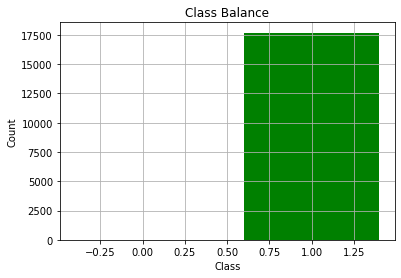

In [9]:
import re
import matplotlib.pyplot as plt
from glob import glob

classes = [0, 0]

for filepath in glob("/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/train/labels/*.txt"):
    with open(filepath,"r") as file:
        line = file.readlines()
        if len(line) != 0:
            classes[1] += 1
        if len(line) == 0:
            classes[0] += 1          
print(classes)
plt.bar([0, 1], classes, color=['red', 'green'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.grid(True)
plt.show()

Almost all of the images have star-fish as seen in the graph. 

Now, let us count the number of starfish in the images. We are doing so, by counting the number of bounding boxes detected for each image. In our labels, each image is in form of a txt file, where the number of lines in that file indicate the total number of bounding boxes.

In [10]:
classes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0]

length = []

for filepath in glob("/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/train/labels/*.txt"):
    with open(filepath,"r") as file:
        line = file.readlines()
        classes[len(line)-1] += 1
print(classes)

[11754, 2511, 1167, 750, 375, 195, 168, 129, 81, 63, 117, 36, 33, 66, 96, 72, 39, 9, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]


In [11]:
len(classes)

42

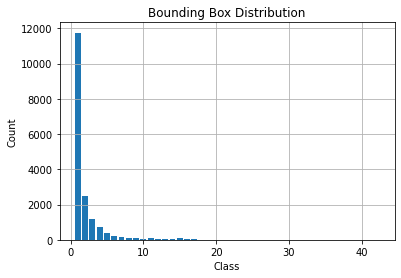

In [12]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42], classes)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Bounding Box Distribution")
plt.grid(True)
plt.show()

We can see that over 11,754 images have at least one star-fish in the image. 2,511 images have two starfish. Very few images have 3+ starfish detected.

### 2.3.4 Sample Image

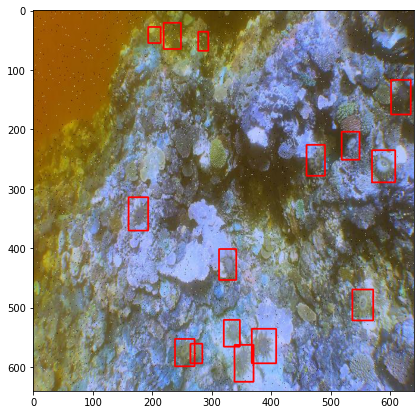

In [13]:
def draw_bounding_box(labelpath, img_path ):   
    bounding_box = open(labelpath,"r")
    img = mpimg.imread(img_path)
    dh, dw, _ = img.shape
    line = bounding_box.readlines()
    for bb in line:
        _, x, y, w, h = map(float, bb.split(' '))
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1
        img=cv2.rectangle(img, (l, t), (r, b), (255,0,0), 2)
    plt.figure(figsize = (10, 7))
    plt.imshow(img)
    plt.show()

image = draw_bounding_box("/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/train/labels/2-5776_jpg.rf.925373d2869219a1dd22a78e84599cba.txt", "/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/train/images/2-5776_jpg.rf.925373d2869219a1dd22a78e84599cba.jpg")

### 2.3.5 Annotation's Format

The last step in this fast `EDA` is oftenly overlooked: checking the annotation's format. The reason why this analysis is crucial, is due to two reasons:
* Scale of Bounding Boxes 
* Compatibility with `YOLO`

In the present case, if we examine carefully, we will see:

* The annotations are in form of txt files representing a file per image.
* The format of the coordinates is compatible with `YOLO`.

___

### 2.3.6. Summary


**Images**

| amount   | format | avg_res     | categories | is_balanced | 
|--------  |--------|-------------|------------|-------------|
| 17,682   | `.jpg` | 640 x 640   |      2     | False       |


**Annotations**

| format | 
|--------|
| `.txt` |

## 2.4. Data Preprocessing

### 2.4.1 `roboflow` for data preprocessing

This is the stage in which we take action, after planning out strategies during the `EDA`. This fundamental stage can make the difference between an underperfoming model and an accurate one. 

In the past, we could do some of the processes about to be made, with the `PIL` package, in tasks such as `Data Augmentation`.

However, with the release of `YOLOv8`, the developers, `ultralytics`, put a lot of emphasis in a tool that they have been supporting for a while know: `roboflow`.

As mentioned before, the tool offers, in a user-friendly `GUI`, a portal in which to deal with the whole preprocessing stage. 

Here is a screenshot on how the interface looks:

<div style = "display: flex; justify-content: center;">
   <div style = "width: 100px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <figcaption>Data Augmentation</figcaption>
      <img width = "500", style = "display: inline-block" src = "https://i.imgur.com/DoHJs9L.png">
  </div>
</div>

### 2.4.2. Data Augmentation

This a tricky step. Data Augmentation is great in theory, but may not be that great in practice. 

COTS vary in lots of aspects, such as size, color, position, etc. Data Augmentation will help us to bring variability to the model, and generalization capabilities to deal with unseen data succesfully.

Nonetheless, we must always keep an eye on the tecnique to implement; an excessive implementation of it may end up adding to much noise to the model, worsening the performance of it.

From this perspective, we have run some experiments and have come up with interesting results:

* Experiment_01: 
    + `Noise`: Up to 3% of pixels (making it more robust to 
* Experiment_02:
    + `Noise`: Up to 3% of pixels
    + `Flip`: Horizontal, Vertical

* Experiment_03: 
    + `Noise`: Up to 3% of pixels (prevents overfitting)
    + `Flip`: Horizontal, Vertical (resilience to orientation changes)
    + `Bounding Box Shear`: +-15º (variability and resilience to camera and subject yaw and pitch angles)
                    
With each iteration, data was enriched accordingly (one new data at source per iteration). We will demonstrate later how the model is able to generalize better, with a better performing model at the same time.

___
### 2.4.3 Summary

* Annotations: `converted`
* Data Augmentation: `[Noise, Flip, Shear]`

## 2.5. Training

### 2.5.1. Introduction

The training phase is crucial in any `Machine Learning ` system. It defines the term itself, as its in it when the algorithm _learns_ the weights to better predict a class.

In `YOLOv8`, leveraging the `Python API` makes the process straightforward. We can either train from scratch our model, or use pretrained models in various sizes, all by invoking the `.train()`method.

Here is an example of it's implementation:

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt") # same for 'yolov8m.pt'
model.train(data="/content/Save-The-Great-Barrier-Reef-5/data.yaml", epochs = 5)

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Save-The-Great-Barrier-Reef-5/data.yaml, epochs=5, patience=50, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=16, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

### 2.5.3. Benchmarking `YOLOv8n`|`YOLOv8m`

Now, drilling down inside `YOLOv8`, we can distinguish 5 different models inside the family:
* `yolov8n`
* `yolov8s`
* `yolov8m`
* `yolov8l`
* `yolov8x`

Depending on the one we choose, we will implement a bigger `Neural Network`, at the cost of `computing power`. Let's compare how `nano` and `medium` perform, and understand whether is worth it or not to implement a larger `network`:

> Note: We will only test `nano`and `medium` due to time and computing constraints. However, ideally, all different models should have been tested.

YOLOv8n
![alternative text](https://i.imgur.com/JaZlMeD.png)

---
YOLOv8m
![alternative text](https://i.imgur.com/nrAtJ3r.png)

YOLOv8n
![alternative text](https://i.imgur.com/lSKpXV7.png)

---
YOLOv8m
![alternative text](https://i.imgur.com/01WNnu6.png)

The results above demonstrate how the `yolov8m` generally performs better, with similar accuracy in the `Confusion Matrix`, slightly better `mAP50|mAP50-95` and smaller `loss`.

This is to be expected, as the neural network grows significantly from one version to another.

Nonetheless, the computational cost (in GPU and memory) may be to exhaustive to implement in commodity hardware. Therefore, for the sake of the experimentation and time constraints, we will focus our experiments in the lightest of the set: `yolov8n`.

### 2.5.4. Hyperparameter Tuning

Now that we have established `YOLOv8n` preference over other models, let's analyze what kid of `hyperparameters` the YOLO constructor offers, to improve the models performance.

Taking  a look into the documentation:


| Key             | Value   | Description                                                                 |
|-----------------|---------|-----------------------------------------------------------------------------|
| device          | ''      | cuda device, i.e. 0 or 0,1,2,3 or cpu. `''` selects available cuda 0 device |
| epochs          | 100     | Number of epochs to train                                                   |
| workers         | 8       | Number of cpu workers used per process. Scales automatically with DDP       |
| batch           | 16      | Batch size of the dataloader                                                |
| imgsz           | 640     | Image size of data in dataloader                                            |
| optimizer       | SGD     | Optimizer used. Supported optimizer are: `Adam`, `SGD`, `RMSProp`           |
| single_cls      | False   | Train on multi-class data as single-class                                   |
| image_weights   | False   | Use weighted image selection for training                                   |
| rect            | False   | Enable rectangular training                                                 |
| cos_lr          | False   | Use cosine LR scheduler                                                     |
| lr0             | 0.01    | Initial learning rate                                                       |
| lrf             | 0.01    | Final OneCycleLR learning rate                                              |
| momentum        | 0.937   | Use as `momentum` for SGD and `beta1` for Adam                              |
| weight_decay    | 0.0005  | Optimizer weight decay                                                      |
| warmup_epochs   | 3.0     | Warmup epochs. Fractions are ok.                                            |
| warmup_momentum | 0.8     | Warmup initial momentum                                                     |
| warmup_bias_lr  | 0.1     | Warmup initial bias lr                                                      |
| box             | 0.05    | Box loss gain                                                               |
| cls             | 0.5     | cls loss gain                                                               |
| cls_pw          | 1.0     | cls BCELoss positive_weight                                                 |
| obj             | 1.0     | bj loss gain (scale with pixels)                                            |
| obj_pw          | 1.0     | obj BCELoss positive_weight                                                 |
| iou_t           | 0.20    | IOU training threshold                                                      |
| anchor_t        | 4.0     | anchor-multiple threshold                                                   |
| fl_gamma        | 0.0     | focal loss gamma                                                            |
| label_smoothing | 0.0     |                                                                             |
| nbs             | 64      | nominal batch size                                                          |
| overlap_mask    | `True`  | **Segmentation**: Use mask overlapping during training                      |
| mask_ratio      | 4       | **Segmentation**: Set mask downsampling                                     |
| dropout         | `False` | **Classification**: Use dropout while training                              |


We can clearly see some of them may be promising to play with, such as `epochs`, `batch_size`, `imgsz`, `optimizer`, `cos_lr`, `warmup_epochs` , `dropout` and last but not least, `lr0`.

Theoretically:

* `epochs`: the more, the merrier, as the algorithm trains for longer time.

* `batch_size`: bigger sizes agilizes the process, but may affect negatively the stability of the updates.

* `imgsz`: is the size of the image to detect. In this case, we should expect small improvements if bigger sizes (at the cost of slower an costly performance), and relevant drops when reducing images size.

* `optimizer`: the default `Stochastic Gradient Descent`is able to generalize better than other like `Adam`, less common in the Computer Vision field.

* `cos_lr`: a boolean sitch to turn on or off the cosine learning rate schedule, making consistent the jumps in the learning rate thought the learning process.

* `dropout`: a classic hyperparameter in Deep Learning, fundamental to reduce the effects of `overfitting`.

* `lr0`: the learning rate plays always a significant role in the learning process. It sets the pace and the path towards convergence. We must keep in mind we have to find a good balance between a big one (0.01) and a small one (0.0001) as both ogf them have their advantages and disadvantages.


From the theoretical point of view, the best combination of hyperparameters would be the following:

In [ ]:
model = YOLO("yolov8n.pt")
model.train(data="/content/Save-The-Great-Barrier-Reef-5/data.yaml", patience = 50, epochs = 75,  batch = 64, workers = 16, imgsz = 640, optimizer = 'SGD', cos_lr = True, lr0 = 0.001, lrf = 0.01, momentum = 0.937,  weight_decay = 0.0005, warmup_epochs = 1, warmup_momentum = 0.8)

Let's see what the plots have to say:

![alternative text](https://i.imgur.com/9jCImw3.png)
![alternative text](https://i.imgur.com/N5qU8AQ.png)

After training for some epochs, we can clearly state there is an slight improvement in performance, when attending to any of the metrics set. This is again to be expected, as it is well know how the `epochs`and `lr` are crucial to tackle a good model.




The smaller `learning_rate` provides an slower yet more consistent learning. From the above we can also conclude less epochs (50) would bring same results. The `loss` and  `mAP50` give excellent results. 


However, one thing to consider too is the capability to generalize: Let's see how our first optimized model, a top-performer according to most of the perfomance metrics, behaves in terms of generalization:

![alternative text](https://i.imgur.com/Jl6T6kV.png)
![alternative text](https://i.imgur.com/TdhgTpC.png)

Looking good... or maybe not?

<div style = "display: flex; justify-content: center;">
   <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <figcaption>Before</figcaption>
      <img width = 500, style = "display: inline-block" src = "https://i.imgur.com/N6Rxx6b.png">
  </div>
     <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <figcaption>After</figcaption>
      <img width = 500, style = "display: inline-block" src = "https://i.imgur.com/ltiZpSt.png">
  </div>
</div>

> Note: Please refer to the videos (`Results/Videos`) to have a better understanding on the difference between both models, and their generalization capabilities.


Surprisingly enough, the less enriched and less optimized model (only optimized in epochs) heavily underperforms when presented with a new dataset, unable to infer the class or in the cases it does, with low confidence and a low `IoU`.

We can then conclude, our final model is an overall good performer in the key areas.

Let's validate our results!

## 2.6. Validation

As easy as `training`was, with `YOLOv8 Python API` we can easily call the `.val()` method to our data path, in order to check how well the model performs in a different split:

In [ ]:
model.val(data="/content/Save-The-Great-Barrier-Reef-5/data.yaml", save_json = True, iou = 0.35, plots = True)

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/valid/labels.cache... 535 images, 0 backgrounds, 0 corrupt: 100%|██████████| 535/535 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:17<00:00,  1.90s/it]
                   all        535       1156      0.875      0.696       0.78      0.395
Speed: 1.5ms preprocess, 13.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


## 2.7. Test

We may also do so with the left split, the `Test` set, for which we should make no further improvements.

In this case, we save the predictions so we can check later on how the bounding boxes were created.

In [ ]:
results = model.predict(source='/content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images', save=True, save_txt=True, save_conf=True)

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

image 1/1903 /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images/0-1000_jpg.rf.70b047114c9b2f8097887b8610f09309.jpg: 416x416 1 Starfish, 36.1ms
image 2/1903 /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images/0-1004_jpg.rf.3ccd691e4c5647bf53ede5455381251e.jpg: 416x416 1 Starfish, 35.2ms
image 3/1903 /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images/0-1006_jpg.rf.1ac2885529bd0e1259b481329a0c72eb.jpg: 416x416 1 Starfish, 33.5ms
image 4/1903 /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images/0-1012_jpg.rf.001b4ee762a40f5001abaa808cd0adfa.jpg: 416x416 1 Starfish, 30.8ms
image 5/1903 /content/Save-The-Great-Barrier-Reef-5/Save-The-Great-Barrier-Reef-5/test/images/0-1013_jpg.rf.573d9533fd26d9b6e59a6e07a1399e7b.jpg: 416x416 1 Starfish, 30.7ms
image 6/1903 /content/Save-The-Great-Barrier-Re

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "/content/runs/detect/predict/0-1004_jpg.rf.c60725745867e400c11dd05c45152611.jpg"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

## 2.8. Deployment

To end up the pipeline, we may export our model as a `.pt`file, ready to be implemented in other devices and further innovated. From this exported model, we will be able to implement a `realtime` solution, both in a webcam interface (through a simple script, `main.py`) or though a fully developed `android app`.

Let's proceed with exporting the model, and later on we will discuss the final implementation of it:

In [ ]:
model.export(format = '')

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (64, 3, 416, 416) BCHW and output shape(s) (64, 5, 3549) (49.6 MB)

TorchScript: starting export with torch 1.13.1+cu116...
TorchScript: export success ✅ 212.8s, saved as runs/detect/train/weights/best.torchscript (99.0 MB)

Export complete (298.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=416 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=416 data=/content/Save-The-Great-Barrier-Reef-5/data.yaml 
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

Finally, we download everything to implement the model in a real-time app:

In [ ]:
!zip -r /content/results.zip /content/Save-The-Great-Barrier-Reef-5/runs/detect

updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/ (stored 0%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/ (stored 0%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/labels_correlogram.jpg (deflated 23%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/args.yaml (deflated 50%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/weights/ (stored 0%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/events.out.tfevents.1677566354.31d864f18cdf.1062.2 (deflated 5%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train3/labels.jpg (deflated 27%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train/ (stored 0%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train/labels_correlogram.jpg (deflated 23%)
updating: content/Save-The-Great-Barrier-Reef-5/runs/detect/train/events.out.tfevents.1677565397.31d864f18cdf.1062.0 (deflated 5%)
updating: content/Save-

In [ ]:
from google.colab import files
files.download("/content/results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.8.1. Deployment as a `webcam` script

This is the most basic deployment of our model: after exporting our model, we can still leverage `YOLOv8` to use the `.predict()` method. This method, used in the `Test`, can take as an argument an `image`, a `video`(as we showed before) or even the `webcam`, to perform live detections.

The code snippet to implement it is the following:

In [ ]:
from ultralytics import YOLO

model = YOLO('best.pt')

results = model.predict(source = 0, show = True)

## 2.8.2. Deployment as an `android app`


<img width="600" style="float:center" 
     src="https://i.imgur.com/Y2mTiph.png" />
    

<a name="Footnote" >4</a>: _Schema on the App Deployment Process_

Now, this a far more challenging one than the previous one. The fact is the previous one may even be useless, as the device must have all the dependencies needed to run correctly. This is a big obstacle, but some may think we may overcome using `Docker` to pack the script with its dependencies.

However, even creating an image of it, could result underperforming in portable devices such as smartphones. Even if `yolov8n` is the tiniest of the set, it could be too much for some commodity hardware.

We must then, find a compromise between performance and accesibility to it. Connecting the dots, it seems like the most reasonable solution to this is implementing an optimized `android app`. Choosing this `OS` brings several advantages:

* Open Source
* Highly Optimized
* Strong Userbase
* Humongous Community
* Compatibility with YOLO `.onnx`


Pretty clear right? So, without any further ado, let's jump into it!

### 2.8.2.1. Model conversion

As mentioned before, we must convert our pretrained model, `best.pt`, into a format compatible with the `OS`and the limited computing capabilities of smartphones. 

> In this aspect, one of the possibilities is to export our model as a `.tflite`model. This format is a squeezed version of a `tensorflow` format, simplifying the net and upgrading substantially the performance in `commodity` hardware. However, we didn't succeed using this approach, as the mapping of the images should be redone.


After some research, we stumbled accross an optimized format, `ncnn`, which involves a `.param`and a `.bin`file that operate together. The format, developed by the chinese company `Tencent`, delivers a high-performance neural network inference framework. This format, nonetheless, is not natively supported by `YOLO`.

However, `YOLO` does indeed support another format for exportation: `.onnx`. The format itself is nothing to write home about, it's a generic format across platforms. However, modifying some methods and classes from `YOLO`source code enables us to leverage that format, to later on implemented to our end application.

Let's then proceed to load our model, exchange the modified classes in the source code, and convert our `model`into the desired `ncnn`format!

In [ ]:
! mkdir yolov8
! cd yolov8
! git clone https://github.com/ultralytics/ultralytics 
! pip install -qe ultralytics
! cd ultralytics

> Note: To reproduce the same results, please proceed to upload the modified file (located at `Scripts/ClassMod/modules.py`) to the workspace (`ultralytics/ultralytics/nn/modules.py`). This must be done before executing the export to the `.onnx` format:

In [ ]:
!yolo task=detect mode=export model=/content/best.pt format=onnx simplify=True opset=13 imgsz=416

Now, we have to convert the `.onnx` file into a `.ncnn`format. 

This can be done leveraging an online conversion tool:

_+info:_ https://convertmodel.com

<img width="400" style="float:left" 
     src="https://i.imgur.com/WBf307t.png" />

     
<a name="Footnote" >5</a>: _Online Conversion Tool_



Hooray! We now have a `.param`and `.bin` files, representing our model. 

All we have left, is modyfying `tencent's` generic app to meet our model requirements. 

We will leverage `Android Studio` to implement the necessary changes.

<div style = "display: flex; justify-content: center;">
   <div style = "width: 900px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <img width = 800, style = "display: inline-block" src = "https://i.imgur.com/AxVHYke.png">
</div>

<a name="Footnote" >6</a>: _Android Studio Interface_

These modifications include:

* Modifying classes to predict
* Updating model to implement
* Adapting the read of outputs to our current `neural network`
* Improving appearance of the app

The following, is the end result of the process:

<div style = "display: flex; justify-content: center;">
   <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <img width = 300, style = "display: inline-block" src = "https://i.imgur.com/lEkOu3c.png">
  </div>
  <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <img width = 300, style = "display: inline-block" src = "https://i.imgur.com/fF18GtM.png">
  </div>
  <div style = "width: 350px; 
  margin: 0 1rem;
    margin-bottom : 1.5rem;">
      <img width = 300, style = "display: inline-block" src = "https://i.imgur.com/bXc5YQP.png">
  </div>
</div>


<a name="Footnote" >7</a>: _Final Result_

<a id='3'></a>

# 3. Conclusions

In conclusion, the implementation of `YOLOv8` in our deep learning project has successfully achieved the original objetive of detecting the invasive Crown of Thorns starfish under the sea. 

By leveraging Computer Vision, we were able to successfully train and optimize a model, and deploy a fully functional Android app that can detect and identify COTS with high accuracy and reliability.

While the results are impressive, we recognize there is still room for improvement. In the future, we plan to expand our dataset to include more images of sea urchin and similar animals, and enhance the app's functionality by introducing GPS logging of the device's location whenever a starfish is located.

As we move forward, we are excited about the endless possibilities that Deep Learning and Computer Vision offer in solving real-world problems, and we look forward to contributing to this field with our ongoing efforts.

<a id='4'></a>

# 4. References


Kaggle. (n.d.). TensorFlow - Great Barrier Reef. Kaggle. Retrieved September 20, 2021, from https://www.kaggle.com/c/tensorflow-great-barrier-reef

STOR Daily. (n.d.). When Crown-of-Thorns Starfish Attack. Retrieved from https://daily.jstor.org/when-crown-of-thorns-starfish-attack/

Roboflow. (n.d.). GBReef - White Balance. Retrieved from https://universe.roboflow.com/pionc-h7qra/gbreef_white_balance-0lejj

Roboflow. (n.d.). Starfish. Retrieved from https://universe.roboflow.com/abdelmageed-ahmed-2ji7p/starfish-dnvdh/dataset/3

Roboflow. (n.d.). COTS Detection. Retrieved from https://universe.roboflow.com/francis-campos-frick-wodnn/cots-detection-uigl5/

Ultralytics. (n.d.). Welcome to Ultralytics documentation! Ultralytics. Retrieved September 20, 2021, from https://docs.ultralytics.com

Ultralytics. (n.d.). ultralytics/ultralytics. GitHub. Retrieved September 20, 2021, from https://github.com/ultralytics/ultralytics.

Tencent. (n.d.). Tencent/ncnn. GitHub. Retrieved September 20, 2021, from https://github.com/Tencent/ncnn.

Android Developers. (n.d.). Build your first app. Android Developers. Retrieved September 20, 2021, from https://developer.android.com/training/basics/firstapp

Tsai, G. (2021, January 18). Top tutorials for deploying custom YOLOv8 on Android. Medium. https://medium.com/@gary.tsai.advantest/top-tutorials-for-deploying-custom-yolov8-on-android-%EF%B8%8F-dd6746afc1e6